### Import all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Import the Dataset

In [2]:
ticker_symbol = 'TSLA'
dataset_path = os.path.join('dataset', f'{ticker_symbol}-stock.csv')

tesla_data = pd.read_csv(dataset_path)
tesla_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2684 entries, 0 to 2683
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2684 non-null   object 
 1   Open       2684 non-null   float64
 2   High       2684 non-null   float64
 3   Low        2684 non-null   float64
 4   Close      2684 non-null   float64
 5   Adj Close  2684 non-null   float64
 6   Volume     2684 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 146.9+ KB


In [3]:
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_data.set_index('Date', inplace=True)

### Visualize the Dataset

In [4]:
tesla_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2684.000000,2684.000000,2684.000000,2684.000000,2684.000000,2.684000e+03
mean,100.437366,102.637908,98.093230,100.412306,100.412306,1.122163e+08
std,108.169254,110.577892,105.534148,108.079334,108.079334,7.359899e+07
min,9.366667,9.800000,9.111333,9.289333,9.289333,1.062000e+07
25%,16.098167,16.323667,15.784167,16.111833,16.111833,6.703255e+07
50%,22.789667,23.159667,22.372333,22.779000,22.779000,9.313935e+07
75%,202.102497,207.324165,198.295830,202.089172,202.089172,1.297347e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


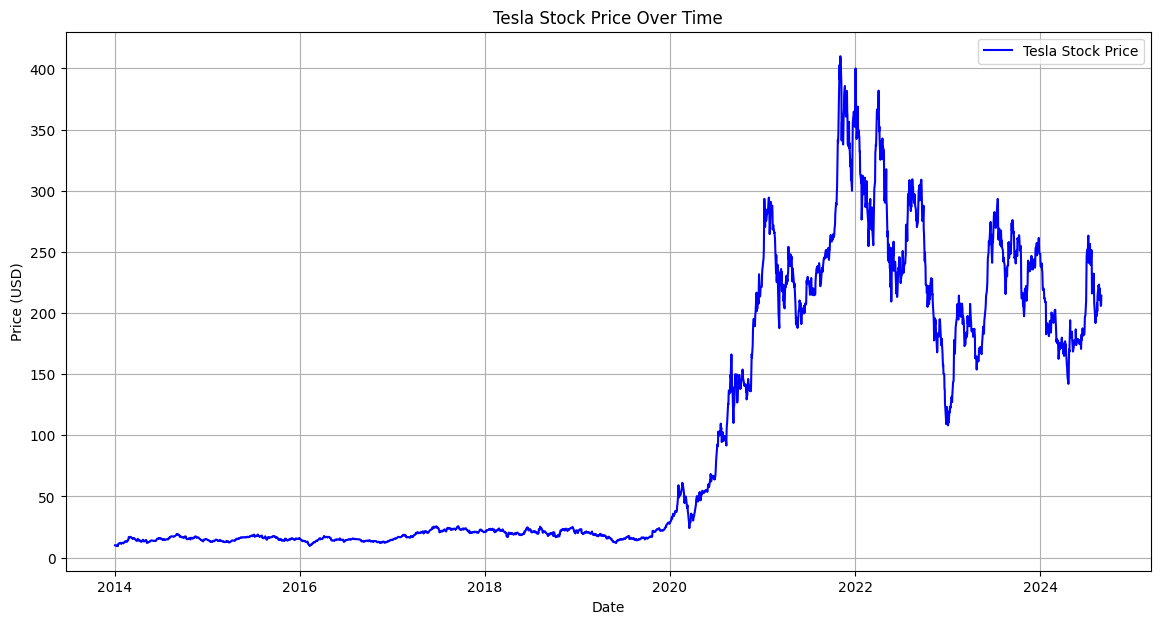

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting the closing price of Tesla stock
plt.figure(figsize=(14, 7))
plt.plot(tesla_data['Close'], label='Tesla Stock Price', color='blue')
plt.title('Tesla Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

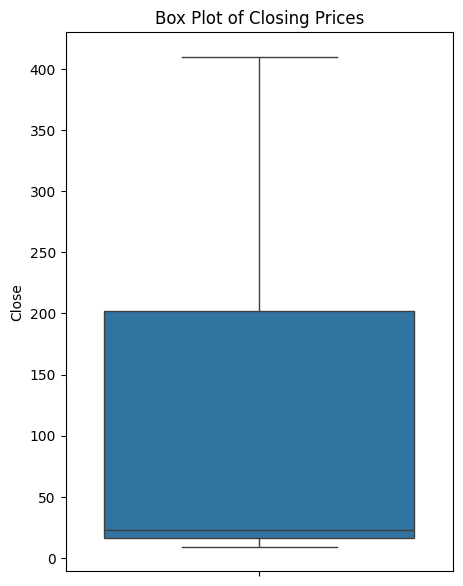

In [6]:
import seaborn as sns

# Box plot to visualize outliers in closing prices
plt.figure(figsize=(5, 7))
sns.boxplot(y=tesla_data['Close'])
plt.title('Box Plot of Closing Prices')
plt.show()

### Augmented Dickey-Fuller (ADF) test

The Augmented Dickey-Fuller (ADF) test is a statistical test used to determine whether a time series is stationary or has a unit root, which indicates non-stationarity.

A stationary time series is one whose statistical properties, such as mean, variance, and autocorrelation, do not change over time. This stability is crucial for many time series analysis techniques, particularly those that rely on the assumption of stationarity for accurate modeling and forecasting.

### Hypothesis Testing:

- H0 (Null Hypothesis): The time-series is non stationary.
- H1 (Alternative Hypothesis): The time-series is stationary.

The p-value associated with the ADF test quantifies the strength of evidence against the null hypothesis. If the p-value is less than a chosen significance level, we reject the null hypothesis, concluding that the time series is stationary.

We choose the confidence interval as 95%.
Therefore, the p-value must be less than 0.05 to reject the null hypothesis.

In [7]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(tesla_data['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.1934001167536903
p-value: 0.6764283516762851


The p-value of 0.6764283516762851 is not less than the chosen value of 0.05. Therefore, we cannot reject the Null hypothesis that this time series is **not stationary**.

### Auto-correlation Function (ACF) and Partial Auto-correlation Function (PACF)

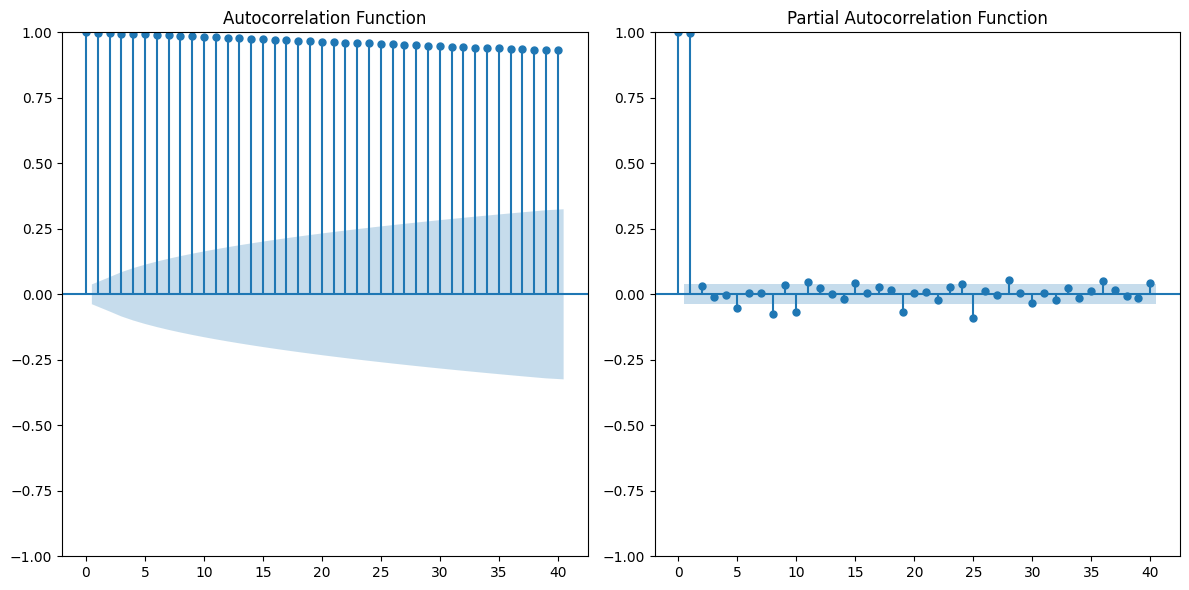

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(tesla_data['Close'], lags=40, ax=plt.gca())
plt.title('Autocorrelation Function')

plt.subplot(122)
plot_pacf(tesla_data['Close'], lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()

### Let's add some transformations to see if we can make this series stationary.

#### 1. Checking the differences

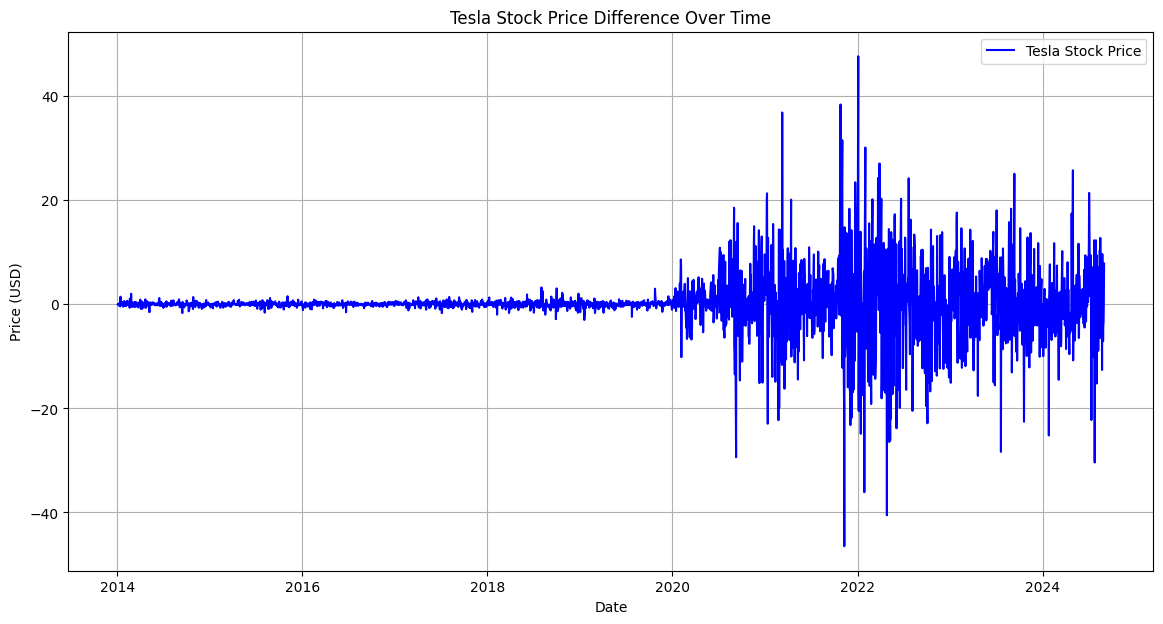

In [9]:
# Differencing
tesla_data['Close_diff'] = tesla_data['Close'].diff()

tesla_data.dropna(inplace=True)

plt.figure(figsize=(14, 7))
plt.plot(tesla_data['Close_diff'], label='Tesla Stock Price', color='blue')
plt.title('Tesla Stock Price Difference Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

#### Augmented Dickey-Fuller (ADF) test

In [10]:
result = adfuller(tesla_data['Close_diff'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -9.935370720775467
p-value: 2.752709841148628e-17


Since the p-value of 2.752709841148628e-17 is less than 0.05, We succesfully reject the Null Hypothesis.
The first difference of this Series is **Stationary**.

#### Auto-correlation Function (ACF) and Partial Auto-correlation Function (PACF)

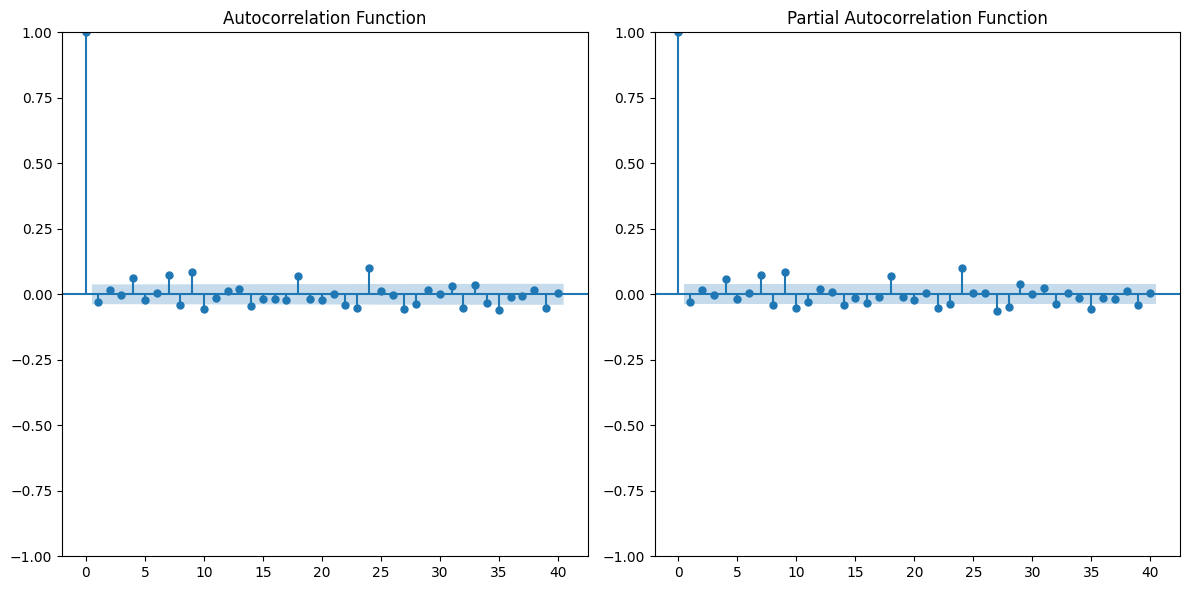

In [11]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(tesla_data['Close_diff'], lags=40, ax=plt.gca())
plt.title('Autocorrelation Function')

plt.subplot(122)
plot_pacf(tesla_data['Close_diff'], lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()

### 2. Log transformation

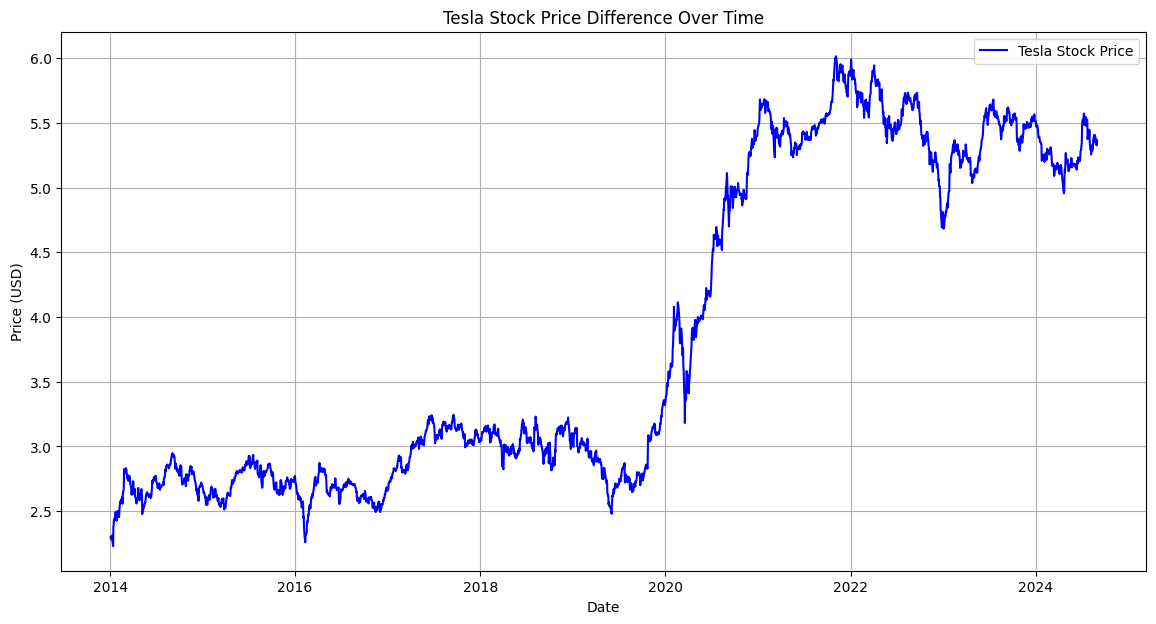

In [12]:
# Log Transformation
tesla_data['Close_log'] = np.log(tesla_data['Close'])

plt.figure(figsize=(14, 7))
plt.plot(tesla_data['Close_log'], label='Tesla Stock Price', color='blue')
plt.title('Tesla Stock Price Difference Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

#### Augmented Dickey-Fuller (ADF) test

In [13]:
result = adfuller(tesla_data['Close_log'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -0.7890874644442549
p-value: 0.8223065448778278


The p-value of 0.6764283516762851 is not less than the chosen value of 0.05. Therefore, we cannot reject the Null hypothesis that this time series is **not stationary**.

#### Auto-correlation Function (ACF) and Partial Auto-correlation Function (PACF)

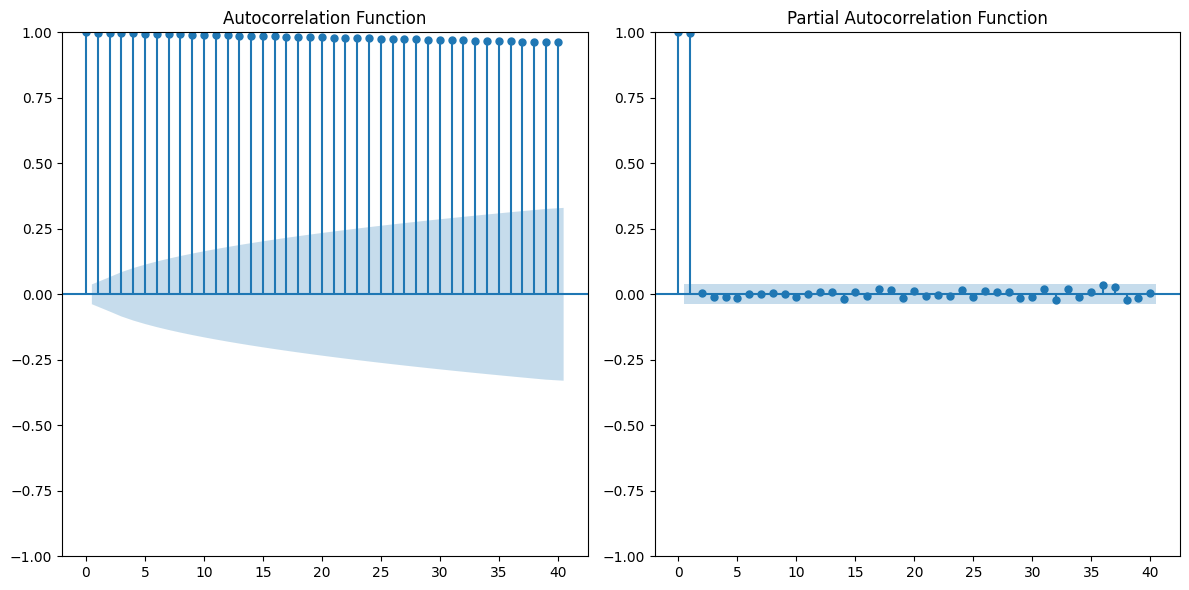

In [14]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(tesla_data['Close_log'], lags=40, ax=plt.gca())
plt.title('Autocorrelation Function')

plt.subplot(122)
plot_pacf(tesla_data['Close_log'], lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()